# Bedu Data Science: Python
## Análisis de los Gases Contaminantes Emitidos en México


### Identificación del Problema. 

El clima de la tierra depende del balance radiativo de la atmósfera, el cual también depende del ingreso de radiación solar y la abundancia de trazas de gases radiantemente activos, es decir, que son capaces de absorber y mantener el calor en la atmósfera terrestre, es así como se logra la temperatura óptima del planeta, entre 14 y 15 °C, ideal para sustentar la vida en la superficie.

Estos gases radiantes también se conocen como gases de efecto invernadero, desde la revolución industrial se han incrementado las concentraciones de ciertos gases, tales como el Dióxido de Carbono ($CO_{2}$), Metano ($CH_{4}$), Clorofluorocarbonos ($CFCs$), Óxido de Nitrógeno ($N_{2}O$)  y ozono troposférico ($O_{3}$), en gran parte gracias a las actividades humanas (Origen Antropogénico).

La mayoría de estos gases tiene un gran tiempo de permanencia atomférico, desde décadas hasta siglos, esto significa que sus concentraciones atomsféricas responden lentamente a los cambios en las tasas de emisión.

De acuerdo con la $EPA$ (Agencia de Protección Ambiental) de EE.UU. en 2018 el 81% de las emisiones de gases de efecto invernadero estaba compuesto por $CO_{2}$, el 10% era Metano, el 7% Óxido de Nitrógeno y el resto, al rededor del 2% fueron gases fluorados.

El Potencial de Calentantamiento Global $(GWP)$ indica la capacidad para retener el calor en la atmósfera, los gases con mayor GWP son los Gases Fluorados, seguido por el óxido de Nitrógeno y Metano, finalmente, el $CO_{2}$.


A pesar de existir diversos acuerdos y tratados para disminuir las emisiones de gases de efecto invernadero, en 2019 se registró el valor más alto de la concentración de $CO_{2}$ en la historia, es por ello que el control de estas emisiones es de crucial importancia para el medio ambiente y sus repercusiones en la salud.

En México, con el fin de monitorear las emisiones de estos gases, se tiene un inventario de Emisiones de Gases y Compuestos de Efecto Invernadero, en él se registran las emisiones de los principales gases contribuyentes al efecto invernadero, que a su vez, se clasifica por sector económico, con esto, pueden controlarse las principales actividades emisoras de gases

La OECD mantiene un registro similar sobre las emisiones de $CO_{2}$ de sus países miembros, por lo tanto, puede realizarse un análisis sobre la emisión de estos contaminantes por país y compararlo con los registros de nuestro territorio nacional.




### Preguntas planteadas.

- Máximo de $N_{2}O, CO_{2}$ y $CH_{4}$.
- Sector más contaminante por Gas.
- ¿En qué año se contaminó más de 1990 a 2010?
- ¿Cuáles fueron las emisiones mínimas que se emitieron por cada gas?
- Sectores que generan más $CO_{2}$.
- Del Sector que más contamina, ¿Cuál es el subsector que aporta más ghg?
- Datos de México con $CO_{2}$ ¿En qué año se emitió más y menos $CO_{2}$?
- Promedio de emisiones de $CO_{2}$ de cada país para compararlos entre sí.
- ¿Cómo se comportaron las emisiones de $CO_{2}$ de los demás países en el/los año(s) que México emitió más $CO_{2}$?

### Colección de Datos

Para este proyecto, utilizaremos la base de datos de emisión de Gases Contaminantes(1990-2010), que se encuentra publicada en Kaggle por la investigadora Irene Liu.
```
Plataforma: Kaggle
Url: https://www.kaggle.com/ireneeliu/green-house-gases-mexico-by-sectors-19902010#
```
También haremos uso de otro recurso que mide la contaminación del aire en el mundo para poder complementar nuestra investigación sobre los GHG en México.
```
Plataforma: Kaggle
Url: https://www.kaggle.com/cemalcemtastan/air-and-ghg-emissions-oecd
```

### Análisis Exploratorio de Datos
        1. Observamos el Dataframe importado.
        2. Análizamos las dimensiones de nuestros datos.
        3. Observamos las columnas y su contenido.
            3.1 Verificamos que los nombres de las columnas sean adecuados.
        4. Búsqueda de Valores Incorrectos.
       


In [1]:
# Importaciones de Librerias Necesarias para la Exploración de Datos.
import pandas as pd
import numpy as np

In [2]:
# Importamos el CSV. 
ghg = pd.read_csv("GHG-Mexico-1990-2010.csv")
air = pd.read_csv("AirAndGHG.csv")

In [3]:
# Observamos el contenido de los Datasets.
print(ghg)
print(air)


      Year  GHG            Sector                     Subsector         Amount
0     1990  CO2            Energy                    Industrial  162232.413919
1     1990  CO2            Energy                   Manufacture   56488.600226
2     1990  CO2            Energy                     Transport  153384.506070
3     1990  CO2            Energy                         Other   33024.673605
4     1990  CO2            Energy            Fugitive emissions   35233.708273
...    ...  ...               ...                           ...            ...
1129  2010  N2O      Silviculture                  Silviculture     112.662545
1130  2010  N2O  Waste management    Elimination of solid waste       0.000000
1131  2010  N2O  Waste management  Bio-treatment of solid waste     127.056600
1132  2010  N2O  Waste management                  Incineration     168.750642
1133  2010  N2O  Waste management                   Waste water            NaN

[1134 rows x 5 columns]
     LOCATION    INDICATOR 

In [4]:
# Dimensiones de nuestros Datos. (Rows, Columns)
print(ghg.shape)
print(air.shape)

(1134, 5)
(2397, 8)


In [5]:
# Contenido del Dataframe, Columnas:
print("DF: ghg")
print(ghg.columns) 
print(ghg.dtypes)

print("DF: air")
print(ghg.columns) 
print(ghg.dtypes)

## Observamos que GHG, Sector, Subsector, deberían ser String en lugar de Object.
## De igual manera en AIR encontramos las mismas inconcistencias.


DF: ghg
Index(['Year', 'GHG', 'Sector', 'Subsector', 'Amount'], dtype='object')
Year           int64
GHG           object
Sector        object
Subsector     object
Amount       float64
dtype: object
DF: air
Index(['Year', 'GHG', 'Sector', 'Subsector', 'Amount'], dtype='object')
Year           int64
GHG           object
Sector        object
Subsector     object
Amount       float64
dtype: object


In [6]:
# Busqueda de valores fuera de Rango o Incorrectos.
print(ghg)
print(air)

#Despues de ejecutar este comando, podemos observar que nuestros datos tienen unos valores nulos y/o irrelevantes.

      Year  GHG            Sector                     Subsector         Amount
0     1990  CO2            Energy                    Industrial  162232.413919
1     1990  CO2            Energy                   Manufacture   56488.600226
2     1990  CO2            Energy                     Transport  153384.506070
3     1990  CO2            Energy                         Other   33024.673605
4     1990  CO2            Energy            Fugitive emissions   35233.708273
...    ...  ...               ...                           ...            ...
1129  2010  N2O      Silviculture                  Silviculture     112.662545
1130  2010  N2O  Waste management    Elimination of solid waste       0.000000
1131  2010  N2O  Waste management  Bio-treatment of solid waste     127.056600
1132  2010  N2O  Waste management                  Incineration     168.750642
1133  2010  N2O  Waste management                   Waste water            NaN

[1134 rows x 5 columns]
     LOCATION    INDICATOR 

### Limpieza de Datos.
Después de analizar nuestros datos, podemos observar que algunos no tienen el tipo correcto y que existen muchos valores nulos que podrían entorpecer nuestra investigación. Es por eso que haremos las modificaciones necesarias para contar con dataframes limpios.

In [7]:
### Limpieza Dataframe GHG
ghg.dtypes ## Observamos que hay algunos datos como Objetos
ghg.convert_dtypes().dtypes   ### Usando este método, Pandas encuentra el dtype que mejor se ajuste

ghg = ghg.dropna(how='any',axis=0)  ## Borramos Nulos

In [8]:
### Limpieza dataframe AIR
air.dtypes
air.convert_dtypes().dtypes
#Quitamos las columnas no necesarias antes de eliminar los NULLS
air = air[['LOCATION','TIME','Value']]
airmx = air.loc[air["LOCATION"]=="MEX"]  ## Obtenemos los valores necesarios para nuestra investigación.
airRDM = air.loc[air["LOCATION"]!="MEX"] ## Obtenemos los valores necesarios para obtener el promedio

### Transformación de Datos.

En este apartado, realizaremos la manipulación de datos necesaria para poder obtener las respuestas a nuestras preguntas planteadas.

#### Pregunta 1
- Valores Máximos de $N_{2}O, CO_{2}$ y $CH_{4}$ en México.


In [19]:
co2_max = ghg[ghg['GHG'] == 'CO2'].sort_values('Amount', ascending = False).head(1)
n2o_max = ghg[ghg['GHG'] == 'N2O'].sort_values('Amount', ascending = False).head(1)
ch4_max = ghg[ghg['GHG'] == 'CH4'].sort_values('Amount', ascending = False).head(1)
ghg_max_frames = [co2_max, n2o_max, ch4_max]
ghg_max_df = pd.concat(ghg_max_frames)
ghg_max_df

,Year,GHG,Sector,Subsector,Amount
974,2008,CO2,Energy,Transport,166496.594781
47,1990,N2O,Agricuture,Soil treatment,46479.758591
1048,2009,CH4,Energy,Fugitive emissions,84213.488299


#### Pregunta 2
- Sector más contaminante por Gas.

In [37]:
sector_CH4 = ghg.loc[ghg['GHG']=="CH4"]
print(" ")
print("Gas CH4:")
sector_CH4 = sector_CH4.groupby('Sector')[['Amount']].sum()
print(sector_CH4.sort_values('Amount', ascending = False).head(1))


sector_CO2 = ghg.loc[ghg['GHG']=="CO2"]
print(" ")
print("Gas CO2:")
sector_CO2 = sector_CO2.groupby('Sector')[['Amount']].sum()
print(sector_CO2.sort_values('Amount', ascending = False).head(1))

sector_N2O = ghg.loc[ghg['GHG']=="N2O"]
print(" ")
print("Gas N2O:")
sector_N2O = sector_N2O.groupby('Sector')[['Amount']].sum()
print(sector_N2O.sort_values('Amount', ascending = False).head(1))

 
Gas CH4:
              Amount
Sector              
Energy  1.264597e+06
 
Gas CO2:
              Amount
Sector              
Energy  7.207033e+06
 
Gas N2O:
                   Amount
Sector                   
Agricuture  935470.354355


#### Pregunta 3
- ¿En qué años se contaminó más de 1990 a 2010?
Considerando un Top 5

In [38]:
ghg.sort_values('Amount', ascending = False).head(5)

,Year,GHG,Sector,Subsector,Amount
974,2008,CO2,Energy,Transport,166496.594781
0,1990,CO2,Energy,Industrial,162232.413919
1080,2010,CO2,Energy,Industrial,162232.413919
1026,2009,CO2,Energy,Industrial,159906.990410
810,2005,CO2,Energy,Industrial,157024.599531


#### Pregunta 4
- ¿Cuáles fueron las emisiones mínimas que se emitieron por cada gas?

In [11]:
min_CH4 = ghg.loc[ghg['GHG']=="CH4"]
print("")
print("Menor Emisión de CH4")
print(min_CH4.loc[min_CH4['Amount'].idxmin()])

min_CO2 = ghg.loc[ghg['GHG']=="CO2"]
print("")
print("Menor Emisión de CO2")
print(min_CO2.loc[min_CO2['Amount'].idxmin()])

min_N2O = ghg.loc[ghg['GHG']=="N2O"]
print("")
print("Menor Emisión de N2O")
print(min_N2O.loc[min_N2O['Amount'].idxmin()])


Menor Emisión de CH4
Year                         1990
GHG                           CH4
Sector       Industrial processes
Subsector                 Mineral
Amount                          0
Name: 23, dtype: object

Menor Emisión de CO2
Year                 1990
GHG                   CO2
Sector         Agricuture
Subsector    Fermentation
Amount                  0
Name: 8, dtype: object

Menor Emisión de N2O
Year                       1990
GHG                         N2O
Sector                   Energy
Subsector    Fugitive emissions
Amount                        0
Name: 40, dtype: object


#### Pregunta 5
- Sectores que generan más $CO_{2}$.

In [12]:
ghg_sector_co2 = ghg[ghg['GHG'] == 'CO2'] 

In [13]:
ghg_per_sector = ghg_sector_co2.groupby('Sector')[['Amount']].sum()
ghg_per_sector.sort_values('Amount', ascending = False)

,Amount
Sector,
Energy,7.207033e+06
Silviculture,1.495735e+06
Industrial processes,7.814388e+05
Waste management,6.173112e+03
Agricuture,0.000000e+00


#### Pregunta 6
- Del Sector que más contamina, ¿Cuál es el subsector que aporta más ghg?

In [14]:
ghg_per_subsector = ghg_sector_co2.groupby('Subsector')[['Amount']].sum()
ghg_per_subsector.sort_values('Amount', ascending = False)

,Amount
Subsector,
Industrial,2.924027e+06
Transport,2.407441e+06
Silviculture,1.495735e+06
Manufacture,1.180120e+06
Other,6.602111e+05
Mineral,6.117732e+05
Metallurgy,1.262375e+05
Chemical,4.342800e+04
Fugitive emissions,3.523371e+04


#### Pregunta 7
- Datos de México con $CO_{2}$ ¿En qué año se emitió más y menos $CO_{2}$?

In [102]:
# Valor mínimo en emisiones de gases de efecto invernadero en México según la OECD
airmx.sort_values('Value', ascending = False).tail(5)

,LOCATION,TIME,Value
302,MEX,2015,3.7
304,MEX,2017,3.6
289,MEX,2002,3.6
301,MEX,2014,3.6
305,MEX,2018,3.5


In [103]:
# Valor máximo de emisiones de ghg en México según la OECD
airmx.sort_values('Value', ascending = False).head(5)

,LOCATION,TIME,Value
294,MEX,2007,4.0
298,MEX,2011,4.0
297,MEX,2010,3.9
292,MEX,2005,3.9
293,MEX,2006,3.9


#### Pregunta 8
- Promedio de emisiones de $CO_{2}$ de cada país para compararlos entre sí.


In [15]:
airRDM = airRDM[["LOCATION","Value"]]
airMEAN = airRDM.groupby('LOCATION').mean()
airMEAN


,Value
LOCATION,
AGO,0.56250
ALB,1.31250
ARE,21.45625
ARG,4.07500
ARM,1.53750
...,...
WLD,4.28750
YEM,0.78750
ZAF,7.72500


In [16]:
airMEAN.sort_values('Value', ascending = False).head(5) # <- Países que Más han contaminado en Promedio


,Value
LOCATION,
QAT,34.52500
KWT,24.96875
BHR,21.63750
ARE,21.45625
LUX,19.70000


In [17]:
airMEAN.sort_values('Value', ascending = True).head(5) # <- Países que Menos han Contaminado

,Value
LOCATION,
COD,0.00625
ETH,0.10000
NER,0.10000
ERI,0.11875
MOZ,0.13750


#### Pregunta 9
- ¿Cómo se comportaron las emisiones de $CO_{2}$ de los demás países en el/los año(s) que México emitió más $CO_{2}$?

In [104]:
# Creamos dos dataframes nuevos para los años en los que México emitió más ghg y tomando sólo los 10 países que emitieron más ghg
air_2007 = air[air['TIME'] == 2007].sort_values('Value', ascending = False).head(10)
air_2011 = air[air['TIME'] == 2011].sort_values('Value', ascending = False).head(10)

In [105]:
# Graficamos utilizando matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

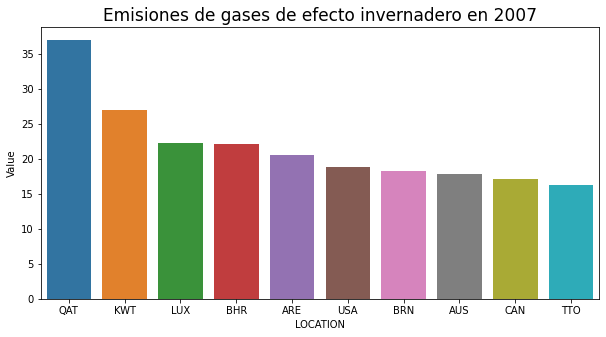

In [106]:
# Gráfica del 2007
plt.figure(figsize=(10,5))
plt.title('Emisiones de gases de efecto invernadero en 2007', size=17)
sns.barplot(x="LOCATION",
           y="Value", 
           ci=False, 
           data=air_2007 ,)

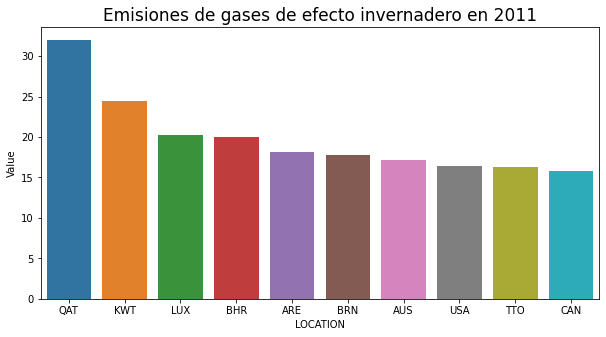

In [107]:
#Gráfica del 2011
plt.figure(figsize=(10,5))
plt.title('Emisiones de gases de efecto invernadero en 2011', size=17)
sns.barplot(x="LOCATION",
           y="Value", 
           ci=False, 
           data=air_2011 ,)